In [51]:
#Initial imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
from pandas import DataFrame
%matplotlib inline

# Data Munging

The data that is used in this analaysis belongs to the **National Survey of Micro Businesses in Mexico** that was runned from 2012-10-01 to 2013-01-13. The full data dictionary could be found in the _data_ directory of this repository.

In [10]:
file_path = "data/enamin-2012.csv"
enamin12 = pd.read_csv(file_path, sep=',', encoding="latin-1")
enamin12.head()

,PER,T_LOC,ENT,CON,V_SEL,N_HOG,H_MUD,N_REN,P1,P2,...,P54_3_2,P54_3_3,P54_3_4,P54_3_5,P54_4_1,P54_4_2,P54_4_3,P54_4_4,P54_4_5,FAC
0,412,1,17,132,5,1,0,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
1,412,1,17,133,5,1,0,3,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
2,412,1,17,143,5,1,0,2,1,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,166
3,412,2,17,144,1,1,0,3,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165
4,412,2,17,147,5,1,0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124


From all the data, the columns that we will use for the analysis are the following:
* _ENT_: The code of the state where the business is located.
* *P9_C*: Line of business.
* _P27_: Who started the business?
* *P27_1*: Year when the business started.
* *P27_2*: Month when the business started.
* _P29_: Why did you start you own business?
* _P34_: Who are the owner?
* _P35_: Type of business association.

In [49]:
data = enamin12[['ENT', 'P9_C', 'P27', 'P27_1', 'P27_2', 'P29', 'P34', 'P35']]
data.columns = ['state_code', 'activity_code', 'founder_code', 'year_start', 'month_start', 'reason_code',
                'owner_code', 'type_assoc_code']
data.head(10)

,state_code,activity_code,founder_code,year_start,month_start,reason_code,owner_code,type_assoc_code
0,17,4611.0,1.0,2008.0,99.0,3.0,1.0,NaN
1,17,4661.0,1.0,2011.0,99.0,13.0,1.0,NaN
2,17,5414.0,1.0,2004.0,99.0,3.0,2.0,1.0
3,17,6141.0,1.0,2012.0,8.0,5.0,1.0,NaN
4,17,5611.0,1.0,2002.0,99.0,13.0,1.0,NaN
5,17,4662.0,1.0,2012.0,7.0,12.0,1.0,NaN
6,17,8121.0,1.0,2008.0,99.0,5.0,1.0,NaN
7,17,7222.0,1.0,2011.0,10.0,2.0,1.0,NaN
8,17,4612.0,1.0,2009.0,99.0,2.0,1.0,NaN
9,17,7222.0,1.0,1986.0,99.0,2.0,1.0,NaN


In [22]:
state_codes = {
    1:'Aguascalientes',
    2:'Baja California Norte',
    3:'Baja California Sur',
    4:'Campeche',
    5:'Coahuila',
    6:'Colima',
    7:'Chiapas',
    8:'Chihuahua',
    9:'Ciudad de México',
    10:'Durango',
    11:'Guanajuato',
    12:'Guerrero',
    13:'Hidalgo',
    14:'Jalisco',
    15:'Estado de México',
    16:'Michoacán',
    17:'Morelos',
    18:'Nayarit',
    19:'Nuevo león',
    20:'Oaxaca',
    21:'Puebla',
    22:'Querétaro',
    23:'Quintana roo',
    24:'San Luis Posotí',
    25:'Sinaloa',
    26:'Sonora',
    27:'Tabasco',
    28:'Tamaulipas',
    29:'Tlaxcala',
    30:'Veracruz',
    31:'Yucatán',
    32:'Zacatecas'
}

In [23]:
activity_codes = {
    1110:'Agricultura',
    1121:'Ganadería',
    1130:'Aprovechamiento forestal',
    1141:'Pesca',
    2361:'Edificación residencial',
    2370:'Construcción de obras de ingeniería civil u obra pesada',
    2382:'Industria alimentaria',
    3110:'Industria de las bebidas y del tabaco',
    3120:'Fabricación de insumos textiles',
    3130:'Confección de productos textiles, excepto prendas de vestir',
    3140:'Confección de productos textiles, excepto prendas de vestir',
    3150:'Fabricación de prendas y accesorios de vestir',
    3160:'Fabricación de productos de cuero, piel y materiales sucedáneos, excepto prendas de vestir',
    3210:'Industria de la madera',
    3220:'Industria de papel',
    3230:'Impresión e industria conexas',
    3270:'Fabricación de productos a base de minerales no metálicos',
    3310:'Industrias metálicas básicas',
    3320:'Fabricación de productos metálicos',
    3370:'Fabricación de muebles y productos relacionados (colchones, cortineros)',
    3380:'Otras industrias manufactureras',
    4310:'Comercio al por mayor de alimentos, bebidas y tabaco',
    4320:'Comercio al por mayor de productos textiles y calzado',
    4340:'Comercio al por mayor de materias primas agropecuarias, para la industria y materiales de desecho',
    4611:'Comercio al por menor de alimentos, bebidas y tabaco',
    4612:'Comercio ambulante de productos alimenticios y bebidas',
    4620:'Comercio al por menor en tiendas de autoservicio y departamentales',
    4631:'Comercio al por menor de productos textiles, ropa nueva, accesorios de vestir y calzado',
    4632:'Comercio ambulante de productos textiles y ropa nueva, accesorios de vestir y calzado',
    4641:'Comercio al por menor de artículos para el cuidado de la salud',
    4642:'Comercio ambulante de artículos para el cuidado de la salud',
    4651:'Comercio al por menor de artículos de papelería, para el esparcimiento y otros artículos de uso personal',
    4652:'Comercio ambulante de artículos de papelería, para el esparcimiento y otros artículos de uso personal',
    4661:'Comercio al por menor de enseres domésticos, computadoras y artículos para la decoración de interiores',
    4662:'Comercio ambulante de muebles para el hogar y otros enseres domésticos',
    4671:'Comercio al por menor de artículos de ferretería, tlapalería y vidrios',
    4672:'Comercio ambulante al por menor de artículos de ferretería y tlapalería',
    4681:'Comercio al por menor de vehículos de motor, refacciones, combustibles y lubricantes',
    4682:'Comercio ambulante de partes y refacciones para automóviles, camionetas y camiones',
    4690:'Intermediación y comercio al por menor por medios masivos de comunicación y otros medios',
    4840:'Autotransporte de carga',
    4881:'Servicios relacionados con el transporte',
    5110:'Edición de publicaciones y de software, excepto a través de internet',
    5322:'Servicios de alquiler y centros de alquiler de bienes muebles, excepto equipo de transporte terrestre',
    5411:'Servicios profesionales, científicos y técnicos',
    5611:'Servicios de administración de negocios, de empleo, apoyo secretarial y otros servicios de apoyo a los negocios',
    5613:'Servicios de limpieza y de instalación y mantenimiento de áreas verdes',
    5620:'Manejo de desechos y servicios de remediación',
    6141:'Otros servicios educativos pertenecientes al sector privado',
    6252:'Guarderías del sector público',
    7111:'Compañías y grupos de espectáculos artísticos',
    7114:'Artistas y técnicos independientes',
    7131:'Servicios de entretenimiento en instalaciones recreativas y otros servicios recreativos',
    7210:'Servicios de alojamiento temporal',
    7221:'Servicios de preparación de alimentos y bebidas',
    7222:'Servicios de preparación de alimentos y bebidas por trabajadores ambulantes',
    8111:'Reparación y mantenimiento de automóviles y camiones',
    8112:'Reparación y mantenimiento de equipo, maquinaria, artículos para el hogar y personales',
    8121:'Servicios personales',
    8122:'Estacionamientos y pensiones para automóviles',
    8123:'Servicios de cuidado y de lavado de automóviles por trabajadores ambulantes',
    8130:'Asociaciones y organizaciones',
    8140:'Hogares con empleado domésticos',
    9700:'Trabajador de otro trabajador'
}

In [25]:
reason_codes = {
    1:'Por tradición familiar o lo heredó',
    2:'Para complementar el ingreso familiar',
    3:'Para mejorar el ingreso',
    4:'Tenía dinero y encontró una buena oportunidad',
    5:'Para ejercer su oficio, carrera o profesión',
    6:'Fue la única manera que tuvo para obtener ingreso',
    7:'No tenía experiencia requerida para un empleo',
    8:'No tenía escolaridad o capacitación requerida para un empleo',
    9:'Estaba sobre capacitado',
    10:'Los empleos que encontró estaban mal pagados',
    11:'Requería un horario flexible',
    12:'No había oportunidades de empleo',
    13:'Otra razón'
}

In [26]:
owner_codes = {
    1:'Un solo dueño',
    2:'Varios dueños'
}

In [27]:
type_assoc_codes = {
    1:'Familiar',
    2:'No familiar',
    3:'Familiar y no familiar'
}

In [29]:
founder_codes = {
    1:'Usted solo (a)',
    2:'Su pareja o cónyuge',
    3:'Usted y su pareja o cónyuge (u otro familiar)',
    4:'Usted y otra (s) personas (s), no familiares',
    5:'Otro(s) familiares(s)',
    6:'Otras(s) persona(s)'
}

In [50]:
data['state'] = data['state_code'].map(state_codes)
data['activity'] = data['activity_code'].map(activity_codes)
data['founder'] = data['founder_code'].map(founder_codes)
data['reason'] = data['reason_code'].map(reason_codes)
data['owner'] = data['owner_code'].map(owner_codes)
data['type_assoc'] = data['type_assoc_code'].map(type_assoc_codes)
data.head(10)

/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,state_code,activity_code,founder_code,year_start,month_start,reason_code,owner_code,type_assoc_code,state,activity,founder,reason,owner,type_assoc
0,17,4611.0,1.0,2008.0,99.0,3.0,1.0,NaN,Morelos,"Comercio al por menor de alimentos, bebidas y ...",Usted solo (a),Para mejorar el ingreso,Un solo dueño,NaN
1,17,4661.0,1.0,2011.0,99.0,13.0,1.0,NaN,Morelos,"Comercio al por menor de enseres domésticos, c...",Usted solo (a),Otra razón,Un solo dueño,NaN
2,17,5414.0,1.0,2004.0,99.0,3.0,2.0,1.0,Morelos,NaN,Usted solo (a),Para mejorar el ingreso,Varios dueños,Familiar
3,17,6141.0,1.0,2012.0,8.0,5.0,1.0,NaN,Morelos,Otros servicios educativos pertenecientes al s...,Usted solo (a),"Para ejercer su oficio, carrera o profesión",Un solo dueño,NaN
4,17,5611.0,1.0,2002.0,99.0,13.0,1.0,NaN,Morelos,"Servicios de administración de negocios, de em...",Usted solo (a),Otra razón,Un solo dueño,NaN
5,17,4662.0,1.0,2012.0,7.0,12.0,1.0,NaN,Morelos,Comercio ambulante de muebles para el hogar y ...,Usted solo (a),No había oportunidades de empleo,Un solo dueño,NaN
6,17,8121.0,1.0,2008.0,99.0,5.0,1.0,NaN,Morelos,Servicios personales,Usted solo (a),"Para ejercer su oficio, carrera o profesión",Un solo dueño,NaN
7,17,7222.0,1.0,2011.0,10.0,2.0,1.0,NaN,Morelos,Servicios de preparación de alimentos y bebida...,Usted solo (a),Para complementar el ingreso familiar,Un solo dueño,NaN
8,17,4612.0,1.0,2009.0,99.0,2.0,1.0,NaN,Morelos,Comercio ambulante de productos alimenticios y...,Usted solo (a),Para complementar el ingreso familiar,Un solo dueño,NaN
9,17,7222.0,1.0,1986.0,99.0,2.0,1.0,NaN,Morelos,Servicios de preparación de alimentos y bebida...,Usted solo (a),Para complementar el ingreso familiar,Un solo dueño,NaN


In [55]:
data['year_start'][data['year_start'] == 9999] = np.nan

/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:4683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exe

In [57]:
data['comp_age'] = datetime.now().year - data['year_start']

/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
data.head(10)

,state_code,activity_code,founder_code,year_start,month_start,reason_code,owner_code,type_assoc_code,state,activity,founder,reason,owner,type_assoc,comp_age
0,17,4611.0,1.0,2008.0,99.0,3.0,1.0,NaN,Morelos,"Comercio al por menor de alimentos, bebidas y ...",Usted solo (a),Para mejorar el ingreso,Un solo dueño,NaN,8.0
1,17,4661.0,1.0,2011.0,99.0,13.0,1.0,NaN,Morelos,"Comercio al por menor de enseres domésticos, c...",Usted solo (a),Otra razón,Un solo dueño,NaN,5.0
2,17,5414.0,1.0,2004.0,99.0,3.0,2.0,1.0,Morelos,NaN,Usted solo (a),Para mejorar el ingreso,Varios dueños,Familiar,12.0
3,17,6141.0,1.0,2012.0,8.0,5.0,1.0,NaN,Morelos,Otros servicios educativos pertenecientes al s...,Usted solo (a),"Para ejercer su oficio, carrera o profesión",Un solo dueño,NaN,4.0
4,17,5611.0,1.0,2002.0,99.0,13.0,1.0,NaN,Morelos,"Servicios de administración de negocios, de em...",Usted solo (a),Otra razón,Un solo dueño,NaN,14.0
5,17,4662.0,1.0,2012.0,7.0,12.0,1.0,NaN,Morelos,Comercio ambulante de muebles para el hogar y ...,Usted solo (a),No había oportunidades de empleo,Un solo dueño,NaN,4.0
6,17,8121.0,1.0,2008.0,99.0,5.0,1.0,NaN,Morelos,Servicios personales,Usted solo (a),"Para ejercer su oficio, carrera o profesión",Un solo dueño,NaN,8.0
7,17,7222.0,1.0,2011.0,10.0,2.0,1.0,NaN,Morelos,Servicios de preparación de alimentos y bebida...,Usted solo (a),Para complementar el ingreso familiar,Un solo dueño,NaN,5.0
8,17,4612.0,1.0,2009.0,99.0,2.0,1.0,NaN,Morelos,Comercio ambulante de productos alimenticios y...,Usted solo (a),Para complementar el ingreso familiar,Un solo dueño,NaN,7.0
9,17,7222.0,1.0,1986.0,99.0,2.0,1.0,NaN,Morelos,Servicios de preparación de alimentos y bebida...,Usted solo (a),Para complementar el ingreso familiar,Un solo dueño,NaN,30.0


# Some Graphics to Understand the Data

# [Graphic 1](#graphic-1)

<Container object of 25450 artists>

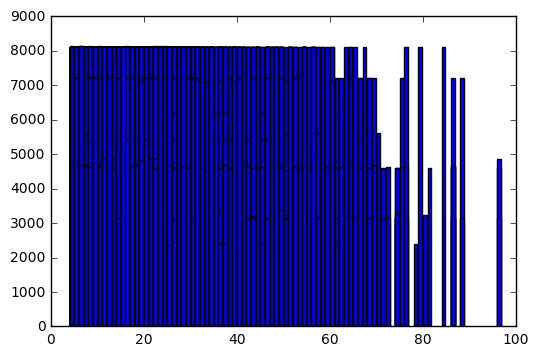

In [60]:
# Most prosperous business nation wide
plt.bar(data.comp_age, data.activity_code, bin)

In [62]:
max(data.comp_age)

96.0